In [108]:
import numpy as np
import scipy
import math
from matplotlib import pyplot as plt
import random
%matplotlib inline

### Funções do EP

Vamos construir uma função que gera grafos não direcionados com loops

In [75]:
def sorteia_grafo(n, p):
    grafo = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            u = random.random()
            if(u < p):
                grafo[i][j] = 1
                grafo[j][i] = 1
    for i in range(n):
        if max(grafo[i]) == 0:
            grafo[i][i] = 1
    return grafo

In [139]:
def C(G, v, w, n, caminho, passos_caminho):
    if v == w:
        if passos_caminho == 0 and G[v][v] == 1:
            return 1.0
        elif passos_caminho > 0:
            return passos_caminho
    
    fila = []
    for j in range(n):
        if G[v][j] == 1 and j != v:
            if j not in caminho or j == w:
                fila.append(j)    
    if v != w:
        if len(fila) == 0:
            return math.inf
    elif passos_caminho != 0:
        return passos_caminho
            
    caminhos = []
    caminho.append(0)
    for vertice in fila:
        caminho = caminho[:-1]
        caminho.append(vertice)
        cam = caminho[:]
        c = C(G, vertice, w, n, cam, passos_caminho + 1.0)
        caminhos.append(c)

    if len(caminhos) == 0:
        return math.inf
    return np.min(caminhos)    

Teremos um total de $\binom{n}{2} + n = \dfrac{n(n+1)}{2}$

In [96]:
def total_caminhos(n):
    return n*(n+1)/2

### Experimentos

In [140]:
p = 0.2 + 0.6*random.random()
p

0.33527312719827795

In [145]:
grafo = sorteia_grafo(8, p)
grafo

array([[0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 1., 0., 0., 0., 1., 0.]])

In [146]:
contagem_bruta = []
for i in range(len(grafo)):
    for j in range(i, len(grafo)):
        contagem_bruta.append(C(grafo, i, j, len(grafo), [i], 0))

In [147]:
max(np.unique(contagem_bruta))

inf

In [148]:
e = np.unique(contagem_bruta)
inf_ = np.array([math.inf])
c = np.setdiff1d(e, inf_)
c

array([1., 2., 3., 4.])

In [149]:
valores_contados = []
frequencia_vc = []
 
for i in range (1, int(max(c)) + 1):
    valores_contados.append(i)
    frequencia_vc.append(contagem_bruta.count(i))

In [150]:
sum(frequencia_vc)

29

In [151]:
len(contagem_bruta)

36

In [152]:
frequencia_vc.append(len(contagem_bruta) - sum(frequencia_vc))

In [153]:
valores_contados.append(math.inf)

In [154]:
valores_contados

[1, 2, 3, 4, inf]

In [155]:
frequencia_vc

[10, 13, 5, 1, 7]

In [156]:
total = total_caminhos(8)
probabilidades = [count/total for count in frequencia_vc]

In [157]:
probabilidades

[0.2777777777777778,
 0.3611111111111111,
 0.1388888888888889,
 0.027777777777777776,
 0.19444444444444445]

In [158]:
sum(probabilidades)

0.9999999999999999

In [159]:
valores_contados = [str(x) + '_' for x in valores_contados]

In [160]:
valores_contados

['1_', '2_', '3_', '4_', 'inf_']

In [161]:
contagem_bruta = [str(x) for x in contagem_bruta]

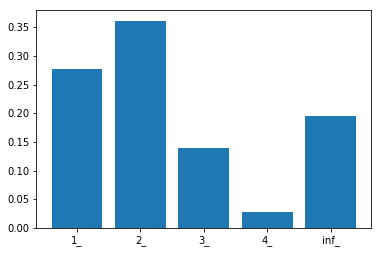

In [163]:
plt.bar(valores_contados, probabilidades)
plt.show()

### Simulações

In [173]:
n = 8

In [210]:
grafo = sorteia_grafo(n, p)
contagem_bruta = []
for i in range(len(grafo)):
    for j in range(i, len(grafo)):
        contagem_bruta.append(C(grafo, i, j, len(grafo), [i], 0))
        
valores_contados = []
frequencia_vc = []
for i in range (1, n + 1):
    valores_contados.append(i)
    frequencia_vc.append(contagem_bruta.count(i))

frequencia_vc.append(len(contagem_bruta) - sum(frequencia_vc))
valores_contados.append(math.inf)
total = total_caminhos(n)
probabilidades = [count/total for count in frequencia_vc]
valores_contados = [str(x) + '_' for x in valores_contados]

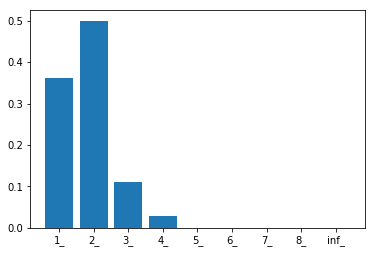

In [211]:
plt.bar(valores_contados, probabilidades)
plt.show()